## Naive Bayes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
wine = load_wine()

In [2]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['wine'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
df.groupby('wine').mean()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
wine,,,,,,,,,,,,,
0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
1,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
2,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('wine', axis=1), df.wine, test_size=0.3, random_state=100)

In [5]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
model1 = GaussianNB()
model2 = MultinomialNB()
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
print(model1.score(X_test, y_test), model2.score(X_test, y_test))

1.0 0.7777777777777778


In [6]:
model1.predict(df.drop('wine', axis=1)[:5])

array([0, 0, 0, 0, 0])

In [7]:
y_pred = model1.predict(X_test)

In [8]:
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [9]:
def print_cm(y_test, y_pred, figsize=None):
    plt.figure(figsize=figsize)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

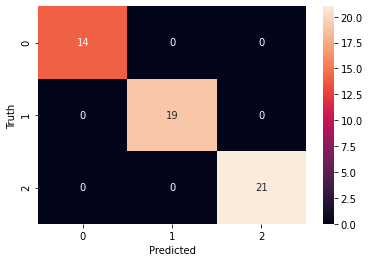

In [10]:
print_cm(y_test, y_pred)